# Part I - (Dataset Exploration - Ford GoBike System Data)
## by (Noel Khaemba)

## Introduction
> This dataset consists of information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.



## Preliminary Wrangling


In [259]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

In [260]:
!ls

201902-fordgobike-tripdata.csv		  Part_II_slide_deck_template.ipynb
Example_Project-REMOVE_before_submission  README.md
Part_I_exploration_template.ipynb


In [261]:
# loading the dataset
fordgobike = pd.read_csv('201902-fordgobike-tripdata.csv')
fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [262]:
fordgobike.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [263]:
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [264]:
fordgobike.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [265]:
#Data cleaning
fordgobike['start_time'] = pd.to_datetime(fordgobike['start_time'])
fordgobike['end_time'] = pd.to_datetime(fordgobike['end_time'])

fordgobike['bike_id'] = fordgobike['bike_id'].astype('str')

#drop records with null values
fordgobike = fordgobike.dropna()

fordgobike['member_birth_year'] = fordgobike['member_birth_year'].astype(int)

#keep only columns that are useful to the investigation for achieving the goal
#bike_clean = fordgobike[['duration_sec','start_time', 'end_time', 'start_station_name', 'end_station_name', 'bike_id', 'user_type']]
#bike_clean.info()


### What is the structure of your dataset?

- There are 183412 Ford GoBike ride records. The original dataset consists of 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). 


### What is/are the main feature(s) of interest in your dataset?

The investigations I will be doing intend to answer the following questions:
-  How long does the average trip take?
-  Does the trip duration depend on if a user is a subscriber or customer?
-  What is the relationship between the age of a bike user and the trip duration?

Therefore, the features of interest in the dataset are duration_sec, user_type, member_birth_year, member_gender, bike_share_for_all_trip

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- duration_sec
- user_type
- member_birth_year
- member_gender
- bike_share_for_all_trip


## Univariate Exploration

> In this section, I investigate distributions of individual variables. I take a deeper look to see if there things that need to be cleaned up and prepare to look at relationships between variables.


In [266]:
fordgobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,2001.000000


In [267]:
fordgobike['age'] = 2019 - fordgobike['member_birth_year']

In [268]:
fordgobike['age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

#### The maximum age is 141 which is likely to be an incorrect entry because at most people live up to 120 years. Also, it's less likely that somebody above 90 years can ride a bike, therefore I exclude records with age above 90.

In [269]:
fordgobike = fordgobike.query('age < 91')

In [271]:
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174875 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec               174875 non-null int64
start_time                 174875 non-null datetime64[ns]
end_time                   174875 non-null datetime64[ns]
start_station_id           174875 non-null float64
start_station_name         174875 non-null object
start_station_latitude     174875 non-null float64
start_station_longitude    174875 non-null float64
end_station_id             174875 non-null float64
end_station_name           174875 non-null object
end_station_latitude       174875 non-null float64
end_station_longitude      174875 non-null float64
bike_id                    174875 non-null object
user_type                  174875 non-null object
member_birth_year          174875 non-null int64
member_gender              174875 non-null object
bike_share_for_all_trip    174875 non-null object
age                        174875 non-null int64
dtypes: datetime64[n

In [272]:
fordgobike['age'].describe()

count    174875.000000
mean         34.160274
std           9.968641
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          89.000000
Name: age, dtype: float64

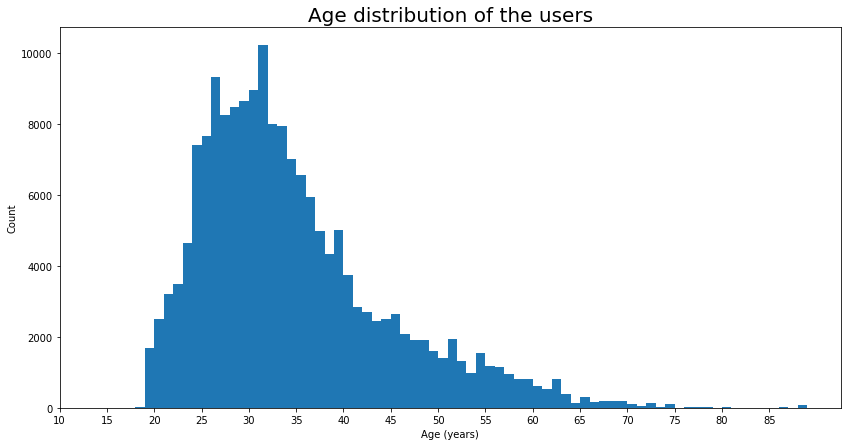

In [273]:
plt.figure(figsize=(14,7))

bins=np.arange(18,90,1)

ax=plt.hist(data=fordgobike, x='age', bins=bins)
plt.xticks(np.arange(10,90,5))
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.title('Age distribution of the users',size=20);

#### From the histogram above it can be observed that the most of the users are of ages between 20-40.

In [274]:
fordgobike.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [275]:
base_color=sb.color_palette()[0]

Text(0.5,1,'Count for each user type')

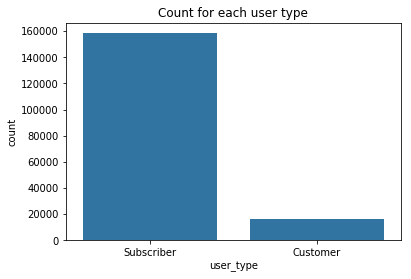

In [276]:
sb.countplot(data=fordgobike, x='user_type', color=base_color, order = ['Subscriber', 'Customer'])
plt.title('Count for each user type')

#### There are more users who are subscribers compared to customers.

Text(0.5,1,'Count of member_gender')

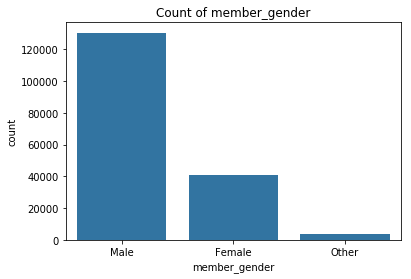

In [277]:
sb.countplot(data=fordgobike, x='member_gender', color=base_color, order=['Male', 'Female', 'Other'])
plt.title('Count of member_gender')

#### There are more male bike riders than other genders.

Text(0.5,1,'Count of bike_share_for_all_trip')

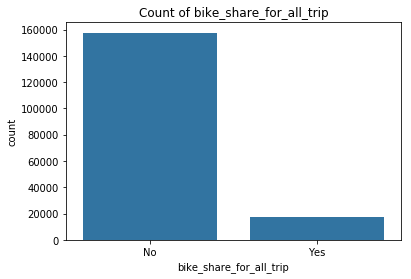

In [278]:
sb.countplot(data=fordgobike, x='bike_share_for_all_trip', color=base_color)
plt.title('Count of bike_share_for_all_trip')

In [279]:
fordgobike.duration_sec.describe()

count    174875.000000
mean        704.028009
std        1642.537925
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

#### The average trip duration is 726.078435 seconds.

In [280]:
np.log10(fordgobike['duration_sec'].describe())

count    5.242728
mean     2.847590
std      3.215515
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

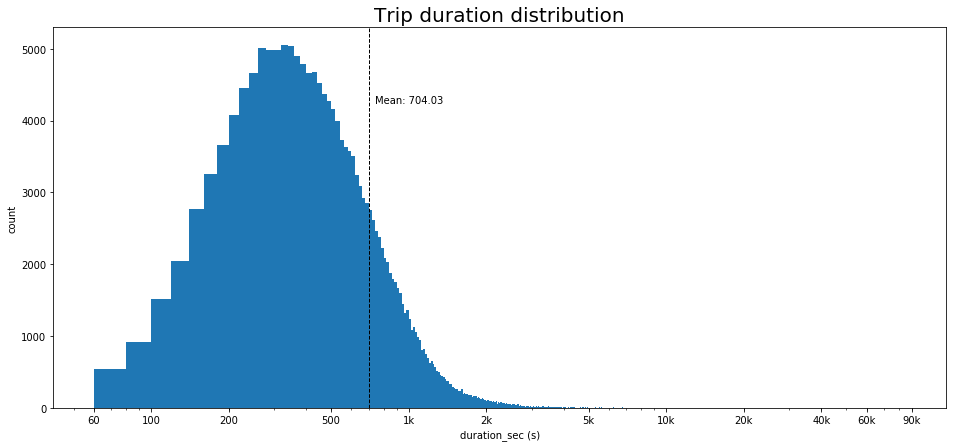

In [310]:
# trip duration plot

bins=np.arange(60,85e3,20)
#bins = 10 ** np.arange(1.7, 4.9+0.1, 0.1)
plt.figure(figsize=[16, 7])

x_ticklocs=[60, 100,200,500,1e3,2e3,5e3,10e3, 20e3,40e3,60e3,90e3]
x_ticklabels=['60','100','200','500','1k','2k','5k','10k','20k','40k','60k','90k']

plt.hist(data = fordgobike, x = 'duration_sec', bins=bins)

plt.axvline(fordgobike.duration_sec.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(fordgobike.duration_sec.mean()*1.05, max_ylim*0.8, 'Mean: {:.2f}'.format(fordgobike.duration_sec.mean()));

plt.xscale('log')

plt.xticks(x_ticklocs, x_ticklabels)
plt.xlabel('duration_sec (s)')
plt.ylabel('count')
plt.title('Trip duration distribution', size=20);

#### It can be observed that most users ride the bikes for about 250 - 750 seconds.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The 'duration_sec' variable had wide spread values with an average of 704.002744 seconds and a maximum value of 84548 seconds. The histogram was skewed to the right. I performed log scaling so that the histogram plot has log normal distribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- Some columns (member_birth_year, member_gender) had missing values so I dropped records with missing values.
- Using the 'member_birth_year' feature I generated a new feature for age of the users in 2019. The maximum age was 141 which is likely to be an incorrect entry because at most people live up to 120 years. Also, it's less likely that somebody above 90 years can ride a bike, therefore I excluded records with age above 90.

## Bivariate Exploration

> In this section, I investigate relationships between pairs of variables in the data. The variables have already been introduced in the univariate exploration.

In [283]:
numeric_vars = ['duration_sec', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 'age']
categoric_vars = ['user_type', 'member_gender', 'bike_share_for_all_trip']

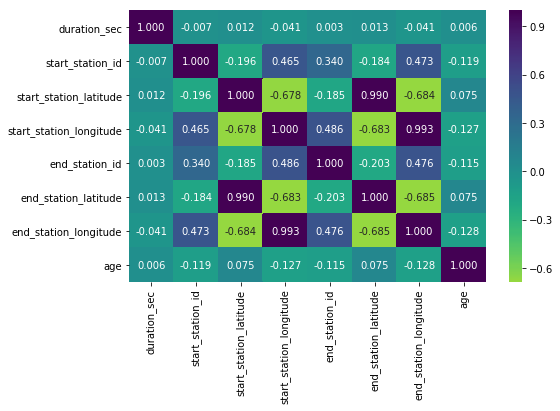

In [284]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(fordgobike[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'viridis_r', center = 0)

From the correlation plot above it can be observed that there is no strong correlation between age and trip duration. There is a strong correlation between start_station_latitude' and 'end_station_latitude', also between 'start_station_longitude' and 'end_station_longitude'. However, these are not the features that I am focusing on in this investigation.

Text(0.5,1,'Age vs biking duration')

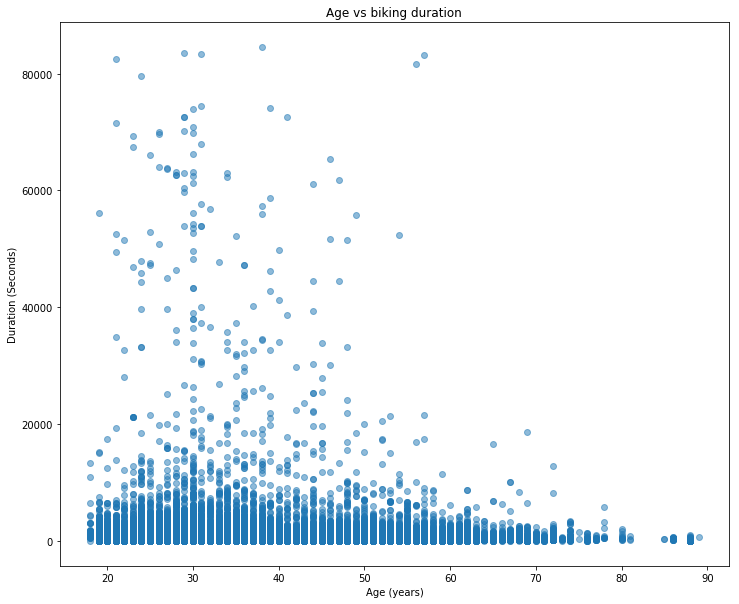

In [314]:
plt.figure(figsize=(12,10))
plt.scatter(data = fordgobike, x = 'age', y = 'duration_sec', alpha=1/2);
plt.xlabel('Age (years)')
plt.ylabel('Duration (Seconds)')
plt.title('Age vs biking duration')
#plt.ylim(0,6000);

#### From the above scatter plot,  it can be observed that the younger people between the ages of 20-50 cycle for long durations compared to those above 60.

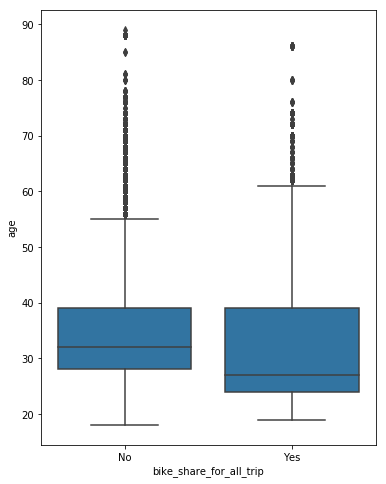

In [286]:
plt.figure(figsize=(6,8))
sb.boxplot(data=fordgobike, x='bike_share_for_all_trip', y='age', color=base_color)

#### From the boxplots it can be observed that mostly young people between 20-35 share bike rides.

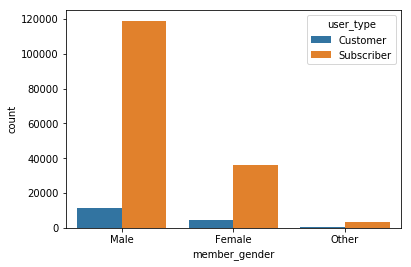

In [287]:
sb.countplot(data = fordgobike, x = 'member_gender', hue = 'user_type', order=['Male', 'Female', 'Other'])

#### This histogram does not provide a conclusive inference however it shows that there are customers and subscribers across the different genders.

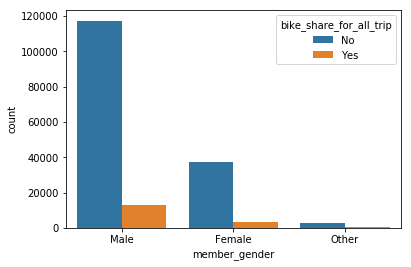

In [288]:
sb.countplot(data = fordgobike, x = 'member_gender', hue = 'bike_share_for_all_trip', order=['Male', 'Female', 'Other'])

#### This histogram does not provide a conclusive observation however it shows that there are people in the different genders who bike share.

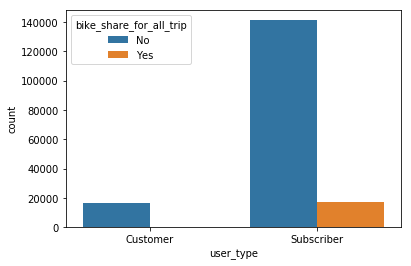

In [289]:
sb.countplot(data = fordgobike, x = 'user_type', hue = 'bike_share_for_all_trip')
plt.legend(title = 'bike_share_for_all_trip', loc='upper left')

#### From the above histogram it can be observed that there are no customers who bike share.

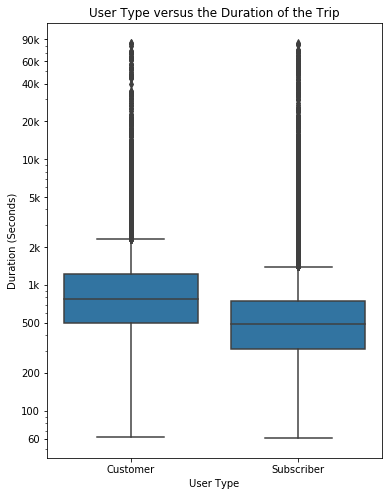

In [290]:
plt.figure(figsize=[6,8])
sb.boxplot(data=fordgobike, x='user_type',y='duration_sec',color=base_color)
plt.yscale('log')
y_ticklocs=[60, 100,200,500,1e3,2e3,5e3,10e3, 20e3,40e3,60e3,90e3]
y_ticklabels=['60','100','200','500','1k','2k','5k','10k','20k','40k','60k','90k']
plt.yticks(y_ticklocs, y_ticklabels)
plt.xlabel('User Type')
plt.ylabel('Duration (Seconds)')
plt.title('User Type versus the Duration of the Trip');

#### It can be noted that on average customers spend a longer time biking than subscribers.

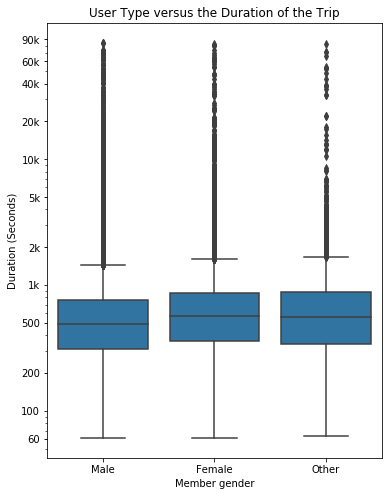

In [291]:
plt.figure(figsize=[6,8])
sb.boxplot(data=fordgobike, x='member_gender', y='duration_sec', color=base_color, order=['Male', 'Female', 'Other'])
plt.yscale('log')
y_ticklocs=[60, 100,200,500,1e3,2e3,5e3,10e3, 20e3,40e3,60e3,90e3]
y_ticklabels=['60','100','200','500','1k','2k','5k','10k','20k','40k','60k','90k']
plt.yticks(y_ticklocs, y_ticklabels)
plt.xlabel('Member gender')
plt.ylabel('Duration (Seconds)')
plt.title('User Type versus the Duration of the Trip');

#### It can be observed that the average trip duration is lowest for the male gender compared to the rest of the genders.

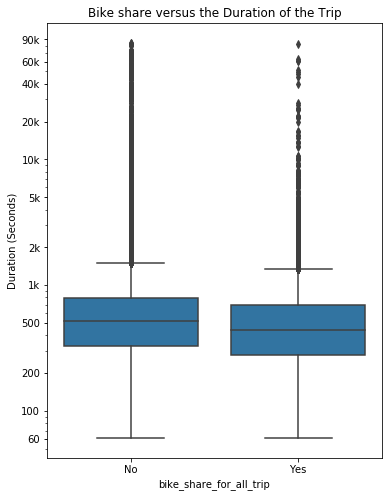

In [292]:
plt.figure(figsize=[6,8])
sb.boxplot(data=fordgobike, x='bike_share_for_all_trip', y='duration_sec', color=base_color)
plt.yscale('log')
y_ticklocs=[60, 100,200,500,1e3,2e3,5e3,10e3, 20e3,40e3,60e3,90e3]
y_ticklabels=['60','100','200','500','1k','2k','5k','10k','20k','40k','60k','90k']
plt.yticks(y_ticklocs, y_ticklabels)
plt.xlabel('bike_share_for_all_trip')
plt.ylabel('Duration (Seconds)')
plt.title('Bike share versus the Duration of the Trip');

#### It can be observed that most bike shares trip duration is lower than those who don't bike share.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- It can be noted that on average customers have long biking durations than subscribers.
- The younger people bike more and for a longer time compared to the elderly.
- Male gender bike for the shortest duration on average comapred to other genders.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Only subscribers bike share, customers don't bike share.
- Most people who bike share are between 20-35 years of age.

## Multivariate Exploration

> In this section, I create plots of three or more variables to further investigate the data from the previous sections.

In [293]:
# numeric_vars = ['duration_sec', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 'age']
# categoric_vars = ['user_type', 'member_gender', 'bike_share_for_all_trip']

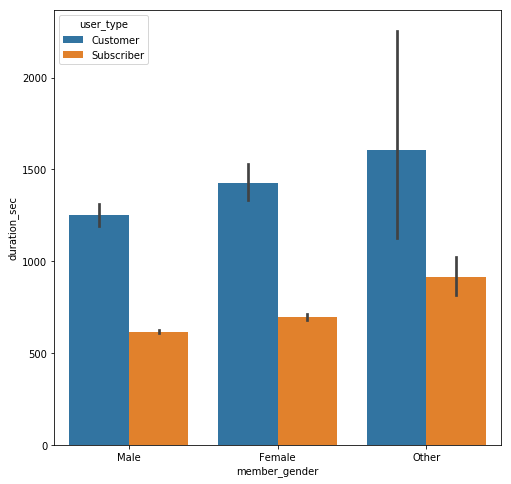

In [294]:
plt.figure(figsize=[8,8])
ax = sb.barplot(data = fordgobike, x = 'member_gender', y = 'duration_sec', hue = 'user_type', order=['Male', 'Female', 'Other'])
ax.legend(loc = 'upper left', title = 'user_type')

#### The 'other' gender category has bike rides with the highest duration compared to the male and female gender. 

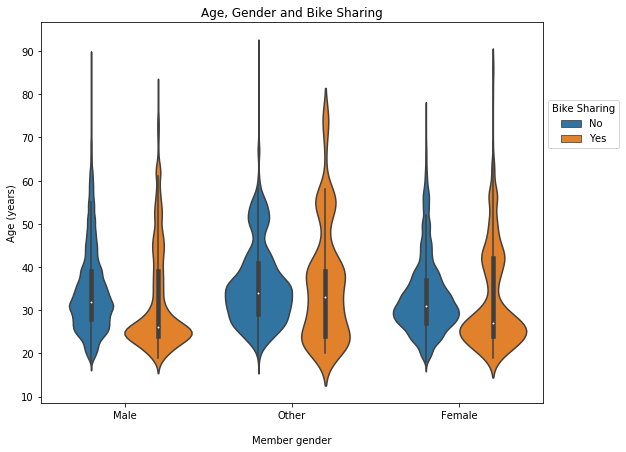

In [316]:
plt.figure(figsize=(9,7))

sb.violinplot(data=fordgobike, x='member_gender', y='age', hue='bike_share_for_all_trip', inner='box')

plt.xlabel('Member gender', labelpad=15)
plt.ylabel('Age (years)')
plt.title('Age, Gender and Bike Sharing')
plt.legend(title='Bike Sharing', bbox_to_anchor=(1, 0.81))

#### From the above violinplot it can be noted that on average, mostly younger people in the various genders are ones who bike share.

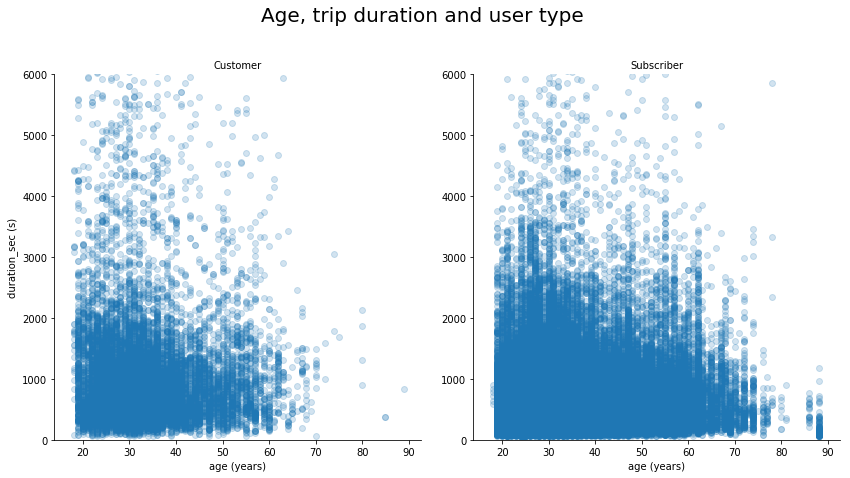

In [315]:
g = sb.FacetGrid(data = fordgobike, col = 'user_type', size = 6)
g.map(sb.regplot, 'age', 'duration_sec', y_jitter = 0.04, fit_reg = False, scatter_kws = {'alpha' : 1/5})

g.set_xlabels('age (years)')
g.set_ylabels('duration_sec (s)')
g.set_titles('{col_name}') 
plt.suptitle('Age, trip duration and user type', size=20, y=1.1)
plt.ylim(0,6000);


#### There are more subscribers with ages below 70 and with low bike durations compared to customers.

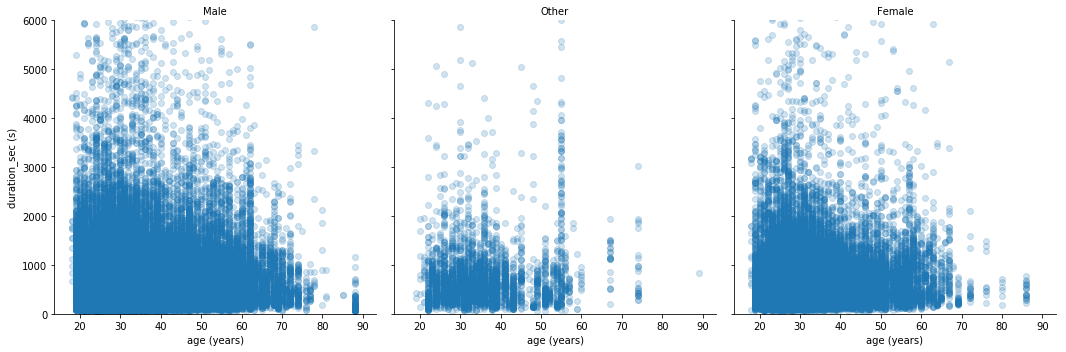

In [297]:
g = sb.FacetGrid(data = fordgobike, col = 'member_gender', size = 5, col_wrap = 3)
#g.map(sb.regplot, 'age', 'duration_sec', y_jitter = 0.04, fit_reg = False, scatter_kws = {'alpha' : 1/5})
g.map(plt.scatter, 'age', 'duration_sec', alpha = 1/5)

g.set_xlabels('age (years)')
g.set_ylabels('duration_sec (s)')
g.set_titles('{col_name}') 
plt.ylim(0,6000);

#### The male gender has the highest number of bike riders and with largest biking durations compared to the other genders.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- The male gender has the highest number of bike riders and with largest biking durations compared to the other genders.
- There are more subscribers with ages below 70 and with low bike durations compared to customers.

### Were there any interesting or surprising interactions between features?

- The mean age of those who bike share across the different genders is lower than those who don't bike share.

## Conclusions
- Customer user type trip durations are longer compared to subscriber user type.
- Most users ride the bikes for about 250 - 750 seconds. The average trip duration is 704.002744 seconds.
- Most of the users are of ages between 20 - 40 years.
- The younger people between the ages of 20 - 50 years have more long duration bike rides than those above 60.
- The mean age of those who bike share across the different genders is lower than those who don't bike share.
- There are more subscribers with ages below 70 and with low bike durations compared to customers.